Imports

In [116]:
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', None)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping

Load Data

In [117]:
df_test = pd.read_pickle(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\TestDataFinalized.pkl")
df_train = pd.read_pickle(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\TrainingDataFinalized.pkl")

Drop extra index column

In [118]:
df_train.drop(labels="index",axis=1,inplace=True)
df_test.drop(labels="index",axis=1,inplace=True)

In [180]:
df_train_og = df_train.copy()

Split into test and train data

In [119]:
y_train = df_train['Litres']
#y_test = df_test['Litres']

X_train = df_train.drop(labels=['Litres','WeekStarting',"Customer",'WeekNumber',
       'Akdeniz Bölgesi', 'Doğu Anadolu Bölgesi',
       'Ege Bölgesi', 'Güneydoğu Anadolu Bölgesi', 'Karadeniz Bölgesi',
       'Marmara Bölgesi', 'İç Anadolu Bölgesi'],axis=1)

X_test = df_test.drop(labels=['Litres','WeekStarting',"Customer",'WeekNumber',
       'Akdeniz Bölgesi', 'Doğu Anadolu Bölgesi',
       'Ege Bölgesi', 'Güneydoğu Anadolu Bölgesi', 'Karadeniz Bölgesi',
       'Marmara Bölgesi', 'İç Anadolu Bölgesi'],axis=1)


In [120]:
df_train.columns

Index(['Customer', 'WeekStarting', 'Litres', 'Price(t-1)', 'NewCars',
       'WeekendHolidays', 'WeekdayHolidays', 'GDPGrowth%', 'MoMInflation%',
       'WoWUSDChange%', 'Litres(w-52)', 'Litres(w-53)', 'Litres(w-54)',
       'Litres(w-52_average_city)', 'Litres(w-53_average_city)',
       'Litres(w-54_average_city)', 'Litres(w-52_average_area)',
       'Litres(w-53_average_area)', 'Litres(w-54_average_area)', 'WeekNumber',
       'Benzin', 'Motorin', 'Akdeniz Bölgesi', 'Doğu Anadolu Bölgesi',
       'Ege Bölgesi', 'Güneydoğu Anadolu Bölgesi', 'Karadeniz Bölgesi',
       'Marmara Bölgesi', 'İç Anadolu Bölgesi', 'Autumn', 'Fall', 'Summer',
       'Winter'],
      dtype='object')

Performance Plotting Functions

In [121]:
def model_evolution_loss(history):  
    # summarize history for loss
    plt.ylim(0,4)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test):
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Valid set evaluation:", model.evaluate(X_valid,y_valid))
    print("Test set evaluation:", model.evaluate(X_train_test,y_train_test))

In [122]:
n_input = X_train.shape[1]
n_input

22

Train Validation split

In [123]:
from sklearn.model_selection import train_test_split 
#X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.1)

# split the year 2018 into the validation set
train_index = df_train[df_train.WeekStarting < '2018-01-01'].index
valid_index = df_train[(df_train.WeekStarting >= '2018-01-01') & (df_train.WeekStarting <= '2018-07-01')].index
test_index = df_train[df_train.WeekStarting > '2018-07-01'].index

X_valid= X_train[X_train.index.isin(valid_index)]
y_valid = y_train[y_train.index.isin(valid_index)]

X_train_test = X_train[X_train.index.isin(test_index)]
y_train_test = y_train[y_train.index.isin(test_index)]

X_train = X_train[X_train.index.isin(train_index)]
y_train = y_train[y_train.index.isin(train_index)]




In [124]:
train_index.shape[0] + valid_index.shape[0] + test_index.shape[0]

380886

Design NN

In [127]:
from tensorflow.keras.metrics import RootMeanSquaredError


model = Sequential()

# hidden layers

model.add(Dense(units=20, activation='relu', input_dim=n_input))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='relu'))


# final layer
model.add(Dense(units=1,activation='relu'))

# Define custom optmizer?
#from keras.optimizers import SGD
#opt = SGD(learning_rate=0.1, momentum=0.9)

# Compile model
#model.compile(loss="MeanSquaredLogarithmicError", optimizer='adam',metrics=["MeanSquaredLogarithmicError","MeanSquaredError"])
model.compile(loss="MeanSquaredError", optimizer='adam',metrics=["MeanSquaredLogarithmicError","RootMeanSquaredError"])
# Train NN
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size = 512,validation_data=(X_valid,y_valid), verbose=1,callbacks=[early_stopping])


Epoch 1/100
555/555 [==============================] - 3s 5ms/step - loss: 1801378432.0000 - mean_squared_logarithmic_error: 18.1362 - root_mean_squared_error: 42442.6484 - val_loss: 366892736.0000 - val_mean_squared_logarithmic_error: 1.4847 - val_root_mean_squared_error: 19154.4434
Epoch 2/100
555/555 [==============================] - 3s 5ms/step - loss: 297949408.0000 - mean_squared_logarithmic_error: 1.3679 - root_mean_squared_error: 17261.2109 - val_loss: 296792608.0000 - val_mean_squared_logarithmic_error: 1.3168 - val_root_mean_squared_error: 17227.6699
Epoch 3/100
555/555 [==============================] - 2s 4ms/step - loss: 278516896.0000 - mean_squared_logarithmic_error: 1.2756 - root_mean_squared_error: 16688.8242 - val_loss: 270460096.0000 - val_mean_squared_logarithmic_error: 1.2772 - val_root_mean_squared_error: 16445.6699
Epoch 4/100
555/555 [==============================] - 2s 4ms/step - loss: 275520256.0000 - mean_squared_logarithmic_error: 1.2344 - root_mean_square

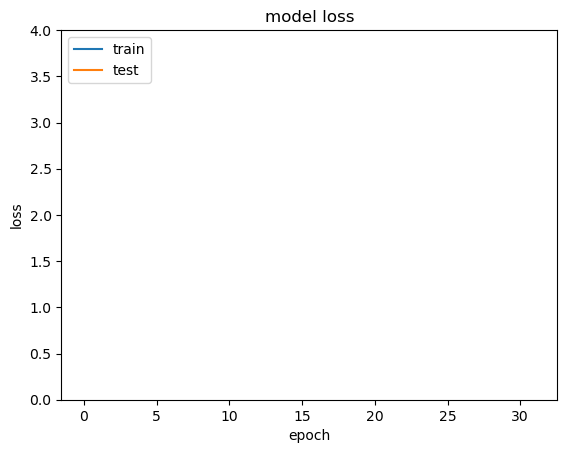

8866/8866 [==============================] - 24s 3ms/step - loss: 269189408.0000 - mean_squared_logarithmic_error: 1.1962 - root_mean_squared_error: 16406.9922
Train set evaluation: [269189408.0, 1.1962336301803589, 16406.9921875]
1500/1500 [==============================] - 4s 3ms/step - loss: 248317392.0000 - mean_squared_logarithmic_error: 1.3051 - root_mean_squared_error: 15758.0898
Valid set evaluation: [248317392.0, 1.3051191568374634, 15758.08984375]
1538/1538 [==============================] - 4s 3ms/step - loss: 290623072.0000 - mean_squared_logarithmic_error: 0.6258 - root_mean_squared_error: 17047.6699
Test set evaluation: [290623072.0, 0.6257816553115845, 17047.669921875]


In [128]:
# Plot model evolution
model_evolution_loss(history)

# print metrics
test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test)

In [129]:
history.history.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'root_mean_squared_error', 'val_loss', 'val_mean_squared_logarithmic_error', 'val_root_mean_squared_error'])

Check that my X_test is the same order as as the original test data

In [130]:
df_test_og = pd.read_csv(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\OriginalData\test.csv")

In [131]:
(df_test_og.Customer == df_test.Customer).sum()

108472

### Plot the results from the validation dataset

In [132]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_train_test_pred = model.predict(X_train_test)

1538/1538 [==============================] - 2s 1ms/step


In [133]:
X_train["Litres(actual)"] = y_train.copy()
X_train["Litres(predicted)"] = y_train_pred.copy()
X_valid["Litres(actual)"] = y_valid.copy()
X_valid["Litres(predicted)"] = y_valid_pred.copy()
X_train_test["Litres(actual)"] = y_train_test.copy()
X_train_test["Litres(predicted)"] = y_train_test_pred.copy()

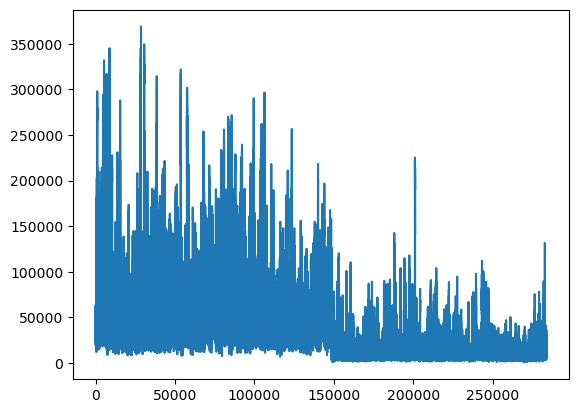

In [134]:
plt.plot(y_train_pred)

In [195]:
df = pd.concat([X_train,X_valid, X_train_test])

In [196]:
df["WeekStarting"] = df_train["WeekStarting"].copy()

In [197]:
df

,Price(t-1),NewCars,WeekendHolidays,WeekdayHolidays,GDPGrowth%,MoMInflation%,WoWUSDChange%,Litres(w-52),Litres(w-53),Litres(w-54),Litres(w-52_average_city),Litres(w-53_average_city),Litres(w-54_average_city),Litres(w-52_average_area),Litres(w-53_average_area),Litres(w-54_average_area),Benzin,Motorin,Autumn,Fall,Summer,Winter,Litres(actual),Litres(predicted),WeekStarting
0,-1.529635,-0.866461,-0.258993,-0.297366,-0.404855,-1.347445,0.266315,0.014464,0.348988,-0.279957,0.060952,0.033895,-0.377463,0.063747,-0.009526,-0.253587,0.0,1.0,0.0,0.0,0.0,1.0,29208.0,43948.433594,2015-01-19
1,-1.474224,-0.866461,-0.258993,-0.297366,-0.404855,-1.347445,1.452540,-0.167086,0.015962,0.351137,-0.577206,0.063278,0.036437,-0.265770,0.066508,-0.006636,0.0,1.0,0.0,0.0,0.0,1.0,38699.0,43747.886719,2015-01-26
2,-1.307989,-0.876943,-0.258993,-0.297366,-0.404855,-1.347445,0.281671,0.500886,-0.165749,0.017492,0.113493,-0.576199,0.065874,-0.116524,-0.263756,0.069552,0.0,1.0,0.0,0.0,0.0,1.0,30040.0,47793.562500,2015-02-02
3,-1.276853,-0.876943,-0.258993,-0.297366,-0.404855,-1.347445,-0.397817,-0.314882,0.502815,-0.164557,-0.239961,0.115927,-0.574768,-0.110461,-0.114172,-0.261382,0.0,1.0,0.0,0.0,0.0,1.0,26393.0,41602.972656,2015-02-09
4,-1.197165,-0.876943,-0.258993,-0.297366,-0.404855,0.132946,-0.236583,0.066941,-0.313677,0.505250,-0.122956,-0.238257,0.118618,-0.089198,-0.108095,-0.111494,0.0,1.0,0.0,0.0,0.0,1.0,30885.0,43324.386719,2015-02-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380881,0.982360,-1.057119,-0.258993,-0.297366,-0.432797,-2.308738,-0.482273,-0.740184,-0.739355,-0.739228,-0.973289,-0.973100,-0.972391,-1.087276,-1.175241,-1.101684,1.0,0.0,0.0,0.0,0.0,1.0,13636.0,10602.678711,2018-12-24
380882,0.963889,-1.057119,-0.258993,-0.297366,0.573113,1.642176,0.285510,-0.736959,-0.849416,-0.738669,-0.968964,-1.120910,-0.971640,-1.102475,-1.155882,-1.194279,1.0,0.0,0.0,0.0,0.0,1.0,18118.0,7719.905762,2018-12-10
380883,0.963889,-1.057119,-0.258993,-0.297366,-0.432797,-2.308738,-0.478434,-0.793793,-0.736127,-0.849494,-1.045200,-0.968765,-1.120471,-1.175195,-1.102357,-1.155318,1.0,0.0,0.0,0.0,0.0,1.0,9701.0,9615.293945,2018-12-17
380884,0.963889,-1.057119,-0.258993,-0.297366,-0.432797,-2.308738,-0.482273,-0.813939,-0.793011,-0.735995,-1.072225,-1.045159,-0.968049,-1.087276,-1.175241,-1.101684,1.0,0.0,0.0,0.0,0.0,1.0,11111.0,9671.377930,2018-12-24


Plot

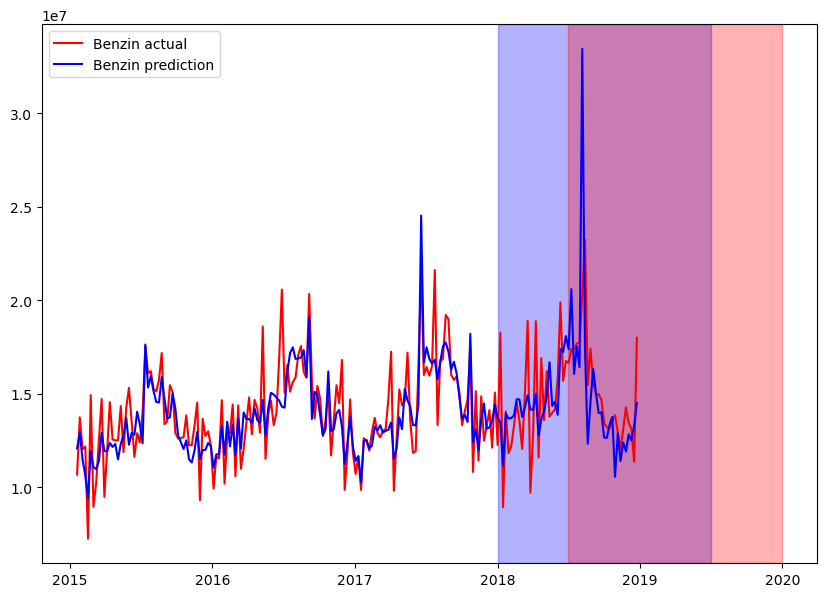

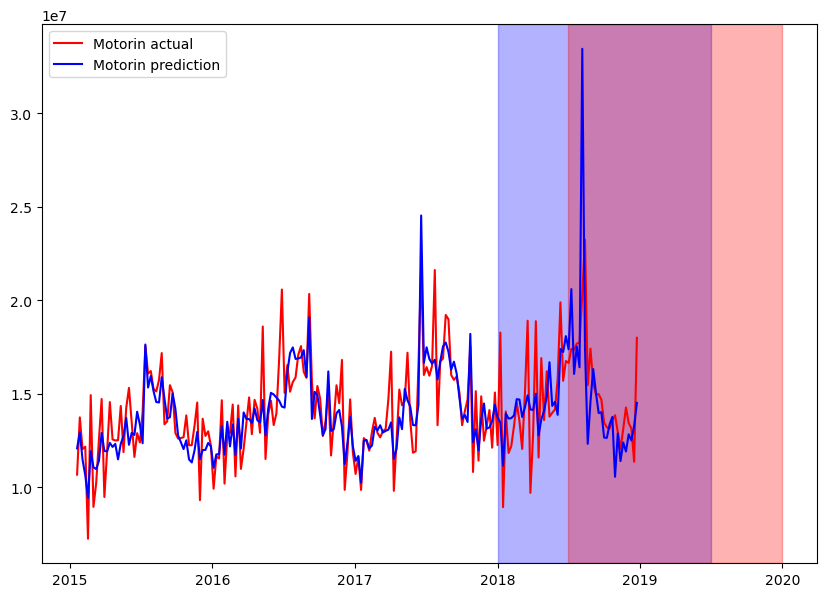

In [199]:
#Benzin
fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)

df1 = df[df["Benzin"] == 1]
df1 = df1.groupby(by=["WeekStarting"],axis=0).sum()
df1.reset_index(inplace=True)

benzin_sales_actual = df1["Litres(actual)"]
benzin_sales_pred = df1["Litres(predicted)"]
dates = df1["WeekStarting"]

ax.plot(dates,benzin_sales_actual,color='r',label="Benzin actual")
ax.plot(dates,benzin_sales_pred,color='b',label="Benzin prediction")
ax.legend()

# highlight a time range
ax.axvspan("2018-01-01", "2019-07-01", color="blue", alpha=0.3)
ax.axvspan("2018-07-01", "2019-12-30", color="red", alpha=0.3)

#Motorin
fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)

df2 = df[df["Motorin"] == 1]
df2 = df2.groupby(by=["WeekStarting"],axis=0).sum()
df2.reset_index(inplace=True)

motorin_sales_actual = df2["Litres(actual)"]
motorin_sales_pred = df2["Litres(predicted)"]
dates = df2["WeekStarting"]

ax.plot(dates,benzin_sales_actual,color='r',label="Motorin actual")
ax.plot(dates,benzin_sales_pred,color='b',label="Motorin prediction")
ax.legend()

# highlight a time range
ax.axvspan("2018-01-01", "2019-07-01", color="blue", alpha=0.3)
ax.axvspan("2018-07-01", "2019-12-30", color="red", alpha=0.3)

#plt.plot(dates,motorin_sales/4.2)

In [193]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 20)                460       
                                                                 
 dense_43 (Dense)            (None, 10)                210       
                                                                 
 dense_44 (Dense)            (None, 15)                165       
                                                                 
 dense_45 (Dense)            (None, 15)                240       
                                                                 
 dense_46 (Dense)            (None, 10)                160       
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,246
Trainable params: 1,246
Non-traina

## Now do prediction

In [172]:
y_test_pred = model.predict(X_test)

3390/3390 [==============================] - 5s 1ms/step


In [173]:
y_test_pred

array([[37507.39 ],
       [31671.455],
       [36628.812],
       ...,
       [ 9086.216],
       [ 8338.571],
       [ 8209.699]], dtype=float32)

In [174]:
n = len(y_test_pred)
n

108472

In [175]:
index_values = np.linspace(0,n-1,n)
df_pred = pd.DataFrame(data = y_test_pred)
df_pred.columns=["Litres"]
df_pred.index.name = 'index'

In [176]:
df_pred.to_csv(r"C:\Users\feyzi\OneDrive - Imperial College London\Programming\ShellDatathonNew\ShellDatathon\SubmissionAttempts\MyTestSubmission.csv")

Plot the weekly liter sum to see estimate

In [177]:
df_test.Litres = y_test_pred

In [182]:
df = pd.concat([df_train_og,df_test])

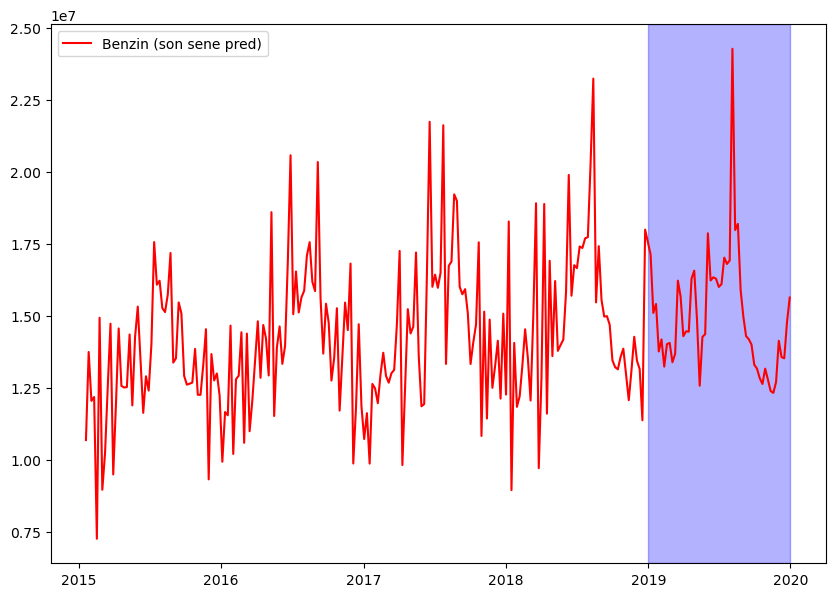

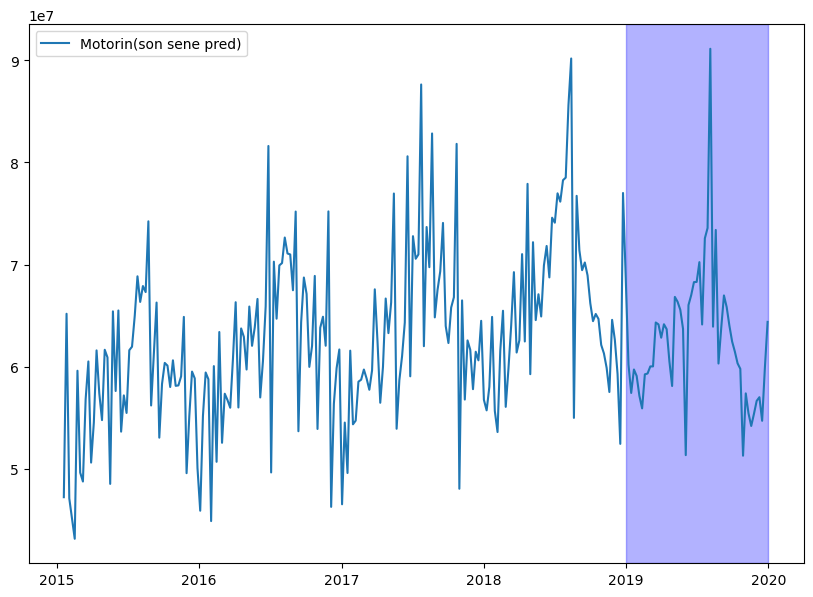

In [190]:
#Benzin


fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)
df1 = df[df["Benzin"] == 1]
df1 = df1.groupby(by=["WeekStarting"],axis=0).sum()
df1.reset_index(inplace=True)
benzin_sales = df1.Litres
dates = df1["WeekStarting"]
plt.plot(dates,benzin_sales,color='r',label="Benzin (son sene pred)")
ax.legend()
ax.axvspan("2019-01-01", "2020-01-01", color="blue", alpha=0.3)

fig, ax = plt.subplots()
fig.set_size_inches(10, 7, forward=True)
df2 = df[df["Motorin"] == 1]
df2 = df2.groupby(by=["WeekStarting"],axis=0).sum()
df2.reset_index(inplace=True)
motorin_sales = df2.Litres
dates = df2["WeekStarting"]
plt.plot(dates,motorin_sales,label="Motorin(son sene pred)")
ax.legend()

# highlight a time range
ax.axvspan("2019-01-01", "2020-01-01", color="blue", alpha=0.3)

#plt.plot(dates,motorin_sales/4.2)